In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
import numpy as np
import cv2
from os import listdir
from os.path import join as p_join
from os.path import abspath
from pathlib import Path 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
PROJDIR = '/content/drive/MyDrive/CP/Computational Photography'
# print(PROJDIR)
DATA = p_join(PROJDIR, 'data')
# WIKIART = p_join(DATA, Emotion6')
%cd /content/drive/MyDrive/CP/Computational Photography

Mounted at /content/drive/
/content/drive/MyDrive/Computational Photography


In [ ]:
# Read statistical data
df3= pd.read_csv("./emotion6_glcm_hsv_laplace_rgb_majoremotiononly.csv", index_col=0)
df3.head()

,folder,image,Emotion,valence,arousal,prob_anger,prob_disgust,prob_fear,prob_joy,prob_sadness,...,energy,correlation,hue,saturation,brightness,Laplacian,contrast2,blue,green,red
0,surprise,24.jpg,joy,7.1,6.3,0.00,0.000000,0.07,0.39,0.07,...,0.031226,0.730294,51.973031,55.975088,174.299329,36.567620,41.166324,146.066706,153.158031,166.905290
1,surprise,7.jpg,joy,6.8,5.2,0.07,0.000000,0.00,0.39,0.00,...,0.018826,0.891327,102.708184,212.938434,151.546566,118.410181,58.335827,132.230597,86.627948,37.049847
2,surprise,13.jpg,surprise,6.9,5.5,0.00,0.066667,0.00,0.37,0.00,...,0.010315,0.657705,71.830794,47.703663,168.878741,551.139546,64.073946,161.684119,151.052795,159.050638
3,surprise,8.jpg,fear,6.3,5.3,0.00,0.100000,0.27,0.13,0.07,...,0.009034,0.800648,104.140910,125.204600,127.730101,491.774325,50.493941,127.447003,99.971180,71.470459
4,surprise,26.jpg,joy,7.6,5.2,0.00,0.000000,0.00,0.47,0.00,...,0.025381,0.750403,99.939447,155.770785,89.011729,178.399478,42.770671,88.159443,62.476169,34.718086


In [ ]:
# df= pd.read_csv("./emotion6_majoremotion.csv")
df= pd.read_csv("./emotion6_features_trainingsplitanmolsmodel.csv", index_col=0)
df.head()

,folder,image,Emotion,valence,arousal,prob_anger,prob_disgust,prob_fear,prob_joy,prob_sadness,...,energy,correlation,hue,saturation,brightness,Laplacian,contrast2,blue,green,red
0,surprise,16.jpg,joy,7.0,5.4,0.0,0.000000,0.00,0.73,0.0,...,0.040799,0.932861,66.380622,209.324406,69.060197,66.818063,16.586504,27.937840,30.691391,55.447202
1,surprise,31.jpg,neutral,5.6,5.4,0.0,0.000000,0.00,0.03,0.0,...,0.046202,0.958463,65.323339,59.244035,125.955914,1138.459596,73.719337,118.299591,125.251066,112.661160
2,surprise,39.jpg,joy,8.0,7.6,0.0,0.000000,0.00,0.60,0.0,...,0.022097,0.964551,47.863550,82.912258,143.042720,489.596686,61.735260,103.632292,140.110718,134.622378
3,surprise,56.jpg,joy,6.1,5.8,0.0,0.066667,0.00,0.67,0.0,...,0.028409,0.981800,59.861067,64.050377,128.706967,185.427038,57.588277,114.029503,114.568469,112.517845
4,surprise,60.jpg,joy,7.3,5.5,0.0,0.000000,0.07,0.57,0.0,...,0.147693,0.988820,48.034896,105.784258,208.211214,205.564903,72.798144,134.902829,182.332829,194.109382


In [ ]:
# Read filtered data, rename columns for join and fix filename
df2= pd.read_csv("./artemis/emotion6_filtered_split.csv", index_col=0)
df2.columns=['folder','image','emotion_distribution',	'split']
df2.head()

,folder,image,emotion_distribution,split
0,disgust,1,"[0.133333, 0.7, 0.0, 0.0666667, 0.1, 0.0, 0.0]",train
2,fear,1,"[0.1, 0.1, 0.533333, 0.0, 0.133333, 0.0, 0.133...",val
3,joy,1,"[0.0, 0.0, 0.0, 0.666667, 0.0, 0.266667, 0.066...",train
4,sadness,1,"[0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0]",train
5,disgust,2,"[0.0222222, 0.377778, 0.522222, 0.0, 0.0777778...",train


In [ ]:
df2['image']=df2['image'].apply(lambda x: str(x)+".jpg")
df2.head()

,folder,image,emotion_distribution,split
0,disgust,1.jpg,"[0.133333, 0.7, 0.0, 0.0666667, 0.1, 0.0, 0.0]",train
2,fear,1.jpg,"[0.1, 0.1, 0.533333, 0.0, 0.133333, 0.0, 0.133...",val
3,joy,1.jpg,"[0.0, 0.0, 0.0, 0.666667, 0.0, 0.266667, 0.066...",train
4,sadness,1.jpg,"[0.0, 0.0, 0.1, 0.0, 0.9, 0.0, 0.0]",train
5,disgust,2.jpg,"[0.0222222, 0.377778, 0.522222, 0.0, 0.0777778...",train


In [ ]:
#Merge Data
data=pd.merge(df2,df3,on=['folder','image'])

In [ ]:
data.head()

,folder,image,emotion_distribution,split,Emotion,valence,arousal,prob_anger,prob_disgust,prob_fear,...,energy,correlation,hue,saturation,brightness,Laplacian,contrast2,blue,green,red
0,disgust,1.jpg,"[0.133333, 0.7, 0.0, 0.0666667, 0.1, 0.0, 0.0]",train,disgust,2.5,3.8,0.13,0.700000,0.00,...,0.015092,0.818343,104.806436,155.505023,141.763584,107.358884,57.749425,140.948594,103.010583,61.039059
1,fear,1.jpg,"[0.1, 0.1, 0.533333, 0.0, 0.133333, 0.0, 0.133...",val,fear,2.8,4.8,0.10,0.100000,0.53,...,0.016157,0.937786,78.188681,86.069711,84.464679,185.473493,39.362713,84.260153,66.195808,49.658682
2,joy,1.jpg,"[0.0, 0.0, 0.0, 0.666667, 0.0, 0.266667, 0.066...",train,joy,8.0,4.5,0.00,0.000000,0.00,...,0.079760,0.941182,49.460364,89.677434,115.451313,68.722260,99.250971,99.763446,112.653565,96.781462
3,disgust,2.jpg,"[0.0222222, 0.377778, 0.522222, 0.0, 0.0777778...",train,fear,1.1,4.3,0.02,0.377778,0.52,...,0.017376,0.872699,106.183060,197.465140,107.947624,58.296182,38.506824,107.844616,60.113763,27.147552
4,sadness,2.jpg,"[0.0333333, 0.0666667, 0.0, 0.0333333, 0.76666...",train,sadness,3.5,4.2,0.03,0.066667,0.00,...,0.026675,0.824844,107.282818,134.634817,71.815418,145.350433,37.382579,71.544115,49.899120,36.543134


In [ ]:
data['split'].value_counts()

train    452
val      180
Name: split, dtype: int64

In [ ]:
#Making train test X and Ys
ll=['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation', 'hue',
       'saturation', 'brightness', 'Laplacian', 'contrast2', 'blue', 'green',
       'red']
train_Y=pd.factorize(data[data['split']=='train']['Emotion'])[0]
train_X=data[data['split']=='train'][ll].values
print(train_X.shape,train_Y.shape)
test_Y=pd.factorize(data[data['split']=='val']['Emotion'])[0]
test_X=data[data['split']=='val'][ll].values
print(test_X.shape,test_Y.shape)

(452, 14) (452,)
(180, 14) (180,)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([('classifier' , RandomForestClassifier())])
# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,14,2))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_X, train_Y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
# Best Classifier score
best_clf.score(test_X,test_Y)

0.5166666666666667

In [ ]:
y_pred=best_clf.predict(test_X)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Classification Report
print(classification_report(test_Y,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.57      0.88      0.69        75
           2       0.12      0.25      0.17         4
           3       0.54      0.51      0.53        51
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         1

    accuracy                           0.52       180
   macro avg       0.18      0.23      0.20       180
weighted avg       0.39      0.52      0.44       180



Feature: contrast, Score: 0.00013
Feature: dissimilarity, Score: 0.04774
Feature: homogeneity, Score: 0.00000
Feature: ASM, Score: 0.00000
Feature: energy, Score: 0.00000
Feature: correlation, Score: 0.00000
Feature: hue, Score: 0.01604
Feature: saturation, Score: -0.01869
Feature: brightness, Score: 0.00000
Feature: Laplacian, Score: -0.00025
Feature: contrast2, Score: -0.06147
Feature: blue, Score: 0.01166
Feature: green, Score: 0.00309
Feature: red, Score: -0.01403


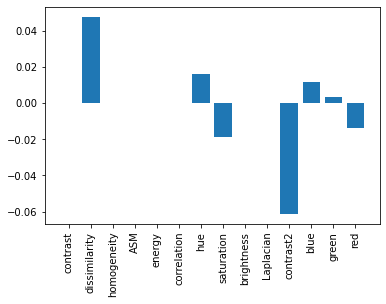

In [ ]:
from matplotlib import pyplot
importance = best_clf.best_estimator_.named_steps['classifier'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (ll[i],v))
# plot feature importance
pyplot.bar([ll[x] for x in range(len(importance))], importance)
pyplot.xticks(rotation=90)
pyplot.show()

ML Model with different features

In [ ]:
%cd computational-aesthetics-master/

/content/drive/MyDrive/Computational Photography/computational-aesthetics-master


In [ ]:
import pandas as pd
# Read and join data for all images
data = pd.read_csv('./data/result/train/edge.txt', sep="\t", names=['Name','edge_density','edge_distribution'],header=None)
data['emotion']=data.apply(lambda x:x.Name.replace('data/train/','').split("\\")[0],axis=1)#.split()[0])
data.head()

,Name,edge_density,edge_distribution,emotion
0,data/train/anger\10.jpg,0.035528,0.280331,anger
1,data/train/anger\11.jpg,0.009047,0.302458,anger
2,data/train/anger\12.jpg,0.005290,0.243600,anger
3,data/train/anger\13.jpg,0.017063,0.153332,anger
4,data/train/anger\14.jpg,0.162820,0.339338,anger


In [ ]:
data2 = pd.read_csv('./data/result/train/basic.txt', sep="\t", names=['Name','file_size', 'height', 'width', 'aspect_ratio', 'size', 'R_mean','G_mean', 'B_mean', 'R_SD','G_SD', 'B_SD', 'H_mean', 'S_mean', 'V_mean', 'H_SD', 'S_SD', 'V_SD', 'X_mean', 'Y_mean', 'Z_mean', 'X_SD', 'Y_SD', 'Z_SD', 'brightness', 'brightness_SD', 'contrast', 'colorfulness', 'color_variety'],header=None)
data2.drop(columns=['file_size', 'height', 'width', 'aspect_ratio', 'size'], inplace=True)
data2.head()

,Name,R_mean,G_mean,B_mean,R_SD,G_SD,B_SD,H_mean,S_mean,V_mean,...,Y_mean,Z_mean,X_SD,Y_SD,Z_SD,brightness,brightness_SD,contrast,colorfulness,color_variety
0,data/train/anger\10.jpg,119.433522,100.039048,95.039937,87.022086,93.229496,95.678251,42.627518,106.486230,122.208852,...,103.804387,100.976625,85.250679,91.375961,97.749912,105.263096,90.727122,255,43.055010,6
1,data/train/anger\11.jpg,22.638491,20.970312,16.960318,32.430180,30.300589,24.663192,14.814973,58.930671,22.663906,...,21.039325,19.032084,28.637015,30.317323,27.677286,21.016109,30.243339,112,9.088009,2
2,data/train/anger\12.jpg,50.843115,48.830940,46.019736,61.098545,58.716168,56.652912,10.455607,22.946510,50.873295,...,49.122185,50.518611,56.416713,59.154195,62.004620,49.155465,59.216718,164,5.861025,2
3,data/train/anger\13.jpg,22.171919,18.484962,16.368207,40.214273,34.791284,29.013017,16.456962,26.409514,22.227799,...,19.105744,18.180711,34.057683,35.415643,32.445780,19.348485,35.603355,140,14.802395,4
4,data/train/anger\14.jpg,64.150656,58.997107,51.078930,74.311304,71.809682,68.147825,23.766376,104.493115,64.282105,...,59.515853,56.556640,68.529631,72.040122,74.089268,59.605279,72.107041,236,14.506119,2


In [ ]:
data3 = pd.read_csv('./data/result/train/box.txt', sep="\t", names=['Name','bbox','box_perc'],header=None)
data3.drop(columns=['bbox'], inplace=True)
data3.head()

,Name,box_perc
0,data/train/anger\10.jpg,0.660773
1,data/train/anger\11.jpg,0.725408
2,data/train/anger\12.jpg,0.504509
3,data/train/anger\13.jpg,0.227623
4,data/train/anger\14.jpg,0.831736


In [ ]:
data4 = pd.read_csv('./data/result/train/colorname.txt', sep="\t", names=['Name', 'perc_black', 'perc_blue', 'perc_brown', 'perc_gray', 'perc_green', 'perc_orange', 'perc_pink', 'perc_purple', 'perc_red', 'perc_white', 'perc_yellow'],header=None)
data4.head()

,Name,perc_black,perc_blue,perc_brown,perc_gray,perc_green,perc_orange,perc_pink,perc_purple,perc_red,perc_white,perc_yellow
0,data/train/anger\10.jpg,0.227968,0.027035,0.191942,0.085766,0.015918,0.059412,0.029530,0.015669,0.121044,0.225607,0.000110
1,data/train/anger\11.jpg,0.907587,0.000000,0.027546,0.021813,0.041892,0.000000,0.000011,0.000000,0.000000,0.000208,0.000943
2,data/train/anger\12.jpg,0.640804,0.000000,0.000000,0.357126,0.000058,0.000000,0.000000,0.000000,0.000000,0.002012,0.000000
3,data/train/anger\13.jpg,0.852788,0.000000,0.109606,0.023151,0.001306,0.000000,0.000407,0.003925,0.008429,0.000381,0.000007
4,data/train/anger\14.jpg,0.579017,0.000000,0.178316,0.148402,0.014023,0.000000,0.004196,0.000000,0.000000,0.075407,0.000639


In [ ]:
print(data.shape,data3.shape,data2.shape,data4.shape)
# print(data5.shape)

(1650, 4) (1650, 2) (1650, 24) (1650, 12)


In [ ]:
data_t = pd.read_csv('./data/result/test/edge.txt', sep="\t", names=['Name','edge_density','edge_distribution'],header=None)
data_t['emotion']=data_t.apply(lambda x:x.Name.replace('data/test/','').split("\\")[0],axis=1)#.split()[0])
data_t.head()

,Name,edge_density,edge_distribution,emotion
0,data/test/anger\1.jpg,0.033520,0.308800,anger
1,data/test/anger\2.jpg,0.088788,0.367920,anger
2,data/test/anger\3.jpg,0.026764,0.232117,anger
3,data/test/anger\4.jpg,0.047164,0.284818,anger
4,data/test/anger\5.jpg,0.007711,0.240595,anger


In [ ]:
data2_t = pd.read_csv('./data/result/test/basic.txt', sep="\t", names=['Name','file_size', 'height', 'width', 'aspect_ratio', 'size', 'R_mean','G_mean', 'B_mean', 'R_SD','G_SD', 'B_SD', 'H_mean', 'S_mean', 'V_mean', 'H_SD', 'S_SD', 'V_SD', 'X_mean', 'Y_mean', 'Z_mean', 'X_SD', 'Y_SD', 'Z_SD', 'brightness', 'brightness_SD', 'contrast', 'colorfulness', 'color_variety'],header=None)
data2_t.drop(columns=['file_size', 'height', 'width', 'aspect_ratio', 'size'], inplace=True)
data2_t.head()

,Name,R_mean,G_mean,B_mean,R_SD,G_SD,B_SD,H_mean,S_mean,V_mean,...,Y_mean,Z_mean,X_SD,Y_SD,Z_SD,brightness,brightness_SD,contrast,colorfulness,color_variety
0,data/test/anger\1.jpg,144.625414,138.274687,137.010953,71.472865,72.259883,71.896942,66.311885,28.750599,146.598697,...,139.478110,148.361050,68.087111,71.925860,76.678162,140.058791,71.885159,224,14.764079,3
1,data/test/anger\2.jpg,133.679043,128.357015,118.085213,74.281647,74.651862,73.937799,48.395323,57.001720,141.572102,...,128.749978,128.767572,69.119540,73.748204,77.814814,128.777949,73.354984,224,41.516376,5
2,data/test/anger\3.jpg,77.732364,48.907736,4.437865,67.996631,47.944769,14.496038,22.774262,238.979729,77.794833,...,51.822575,11.532041,45.775482,48.843519,17.293417,52.408569,48.739097,160,79.607587,3
3,data/test/anger\4.jpg,90.145894,90.145894,90.145894,82.700864,82.700864,82.700864,0.000000,0.000000,90.145894,...,90.145894,97.866280,78.578671,82.700864,89.542979,90.145894,82.700864,234,0.000000,0
4,data/test/anger\5.jpg,112.378651,112.378651,112.378651,59.946473,59.946473,59.946473,0.000000,0.000000,112.378651,...,112.378651,122.330515,56.958179,59.946473,65.271039,112.378651,59.946473,186,0.000000,0


In [ ]:
data3_t = pd.read_csv('./data/result/test/box.txt', sep="\t", names=['Name','bbox','box_perc'],header=None)
data3_t.drop(columns=['bbox'], inplace=True)
data3_t.head()

,Name,box_perc
0,data/test/anger\1.jpg,0.801137
1,data/test/anger\2.jpg,0.906323
2,data/test/anger\3.jpg,0.400867
3,data/test/anger\4.jpg,0.439593
4,data/test/anger\5.jpg,0.367920


In [ ]:
data4_t = pd.read_csv('./data/result/test/colorname.txt', sep="\t", names=['Name', 'perc_black', 'perc_blue', 'perc_brown', 'perc_gray', 'perc_green', 'perc_orange', 'perc_pink', 'perc_purple', 'perc_red', 'perc_white', 'perc_yellow'],header=None)
data4_t.head()

,Name,perc_black,perc_blue,perc_brown,perc_gray,perc_green,perc_orange,perc_pink,perc_purple,perc_red,perc_white,perc_yellow
0,data/test/anger\1.jpg,0.165826,0.020115,0.084066,0.409920,0.000120,0.000000,0.022103,0.002974,0.000000,0.294860,0.000015
1,data/test/anger\2.jpg,0.253334,0.120236,0.198174,0.219398,0.026522,0.021633,0.011018,0.005291,0.001478,0.077851,0.065065
2,data/test/anger\3.jpg,0.389762,0.000156,0.285208,0.000696,0.000874,0.117359,0.000601,0.000399,0.012740,0.000433,0.191773
3,data/test/anger\4.jpg,0.532732,0.000000,0.000000,0.249071,0.000000,0.000000,0.000000,0.000000,0.000000,0.218197,0.000000
4,data/test/anger\5.jpg,0.300454,0.000000,0.000000,0.689932,0.000000,0.000000,0.000000,0.000000,0.000000,0.009614,0.000000


In [ ]:
train=pd.merge(data,data2,on=['Name'],how='inner')
train=pd.merge(train,data3,on=['Name'],how='inner')
train=pd.merge(train,data4,on=['Name'],how='inner')
# Final Train Data
train.head()

,Name,edge_density,edge_distribution,emotion,R_mean,G_mean,B_mean,R_SD,G_SD,B_SD,...,perc_blue,perc_brown,perc_gray,perc_green,perc_orange,perc_pink,perc_purple,perc_red,perc_white,perc_yellow
0,data/train/anger\10.jpg,0.035528,0.280331,anger,119.433522,100.039048,95.039937,87.022086,93.229496,95.678251,...,0.027035,0.191942,0.085766,0.015918,0.059412,0.029530,0.015669,0.121044,0.225607,0.000110
1,data/train/anger\11.jpg,0.009047,0.302458,anger,22.638491,20.970312,16.960318,32.430180,30.300589,24.663192,...,0.000000,0.027546,0.021813,0.041892,0.000000,0.000011,0.000000,0.000000,0.000208,0.000943
2,data/train/anger\12.jpg,0.005290,0.243600,anger,50.843115,48.830940,46.019736,61.098545,58.716168,56.652912,...,0.000000,0.000000,0.357126,0.000058,0.000000,0.000000,0.000000,0.000000,0.002012,0.000000
3,data/train/anger\13.jpg,0.017063,0.153332,anger,22.171919,18.484962,16.368207,40.214273,34.791284,29.013017,...,0.000000,0.109606,0.023151,0.001306,0.000000,0.000407,0.003925,0.008429,0.000381,0.000007
4,data/train/anger\14.jpg,0.162820,0.339338,anger,64.150656,58.997107,51.078930,74.311304,71.809682,68.147825,...,0.000000,0.178316,0.148402,0.014023,0.000000,0.004196,0.000000,0.000000,0.075407,0.000639


In [ ]:
train.shape

(1650, 39)

In [ ]:
test=pd.merge(data_t,data2_t,on=['Name'],how='inner')
test=pd.merge(test,data3_t,on=['Name'],how='inner')
test=pd.merge(test,data4_t,on=['Name'],how='inner')
# Final Test Data
test.head()

,Name,edge_density,edge_distribution,emotion,R_mean,G_mean,B_mean,R_SD,G_SD,B_SD,...,perc_blue,perc_brown,perc_gray,perc_green,perc_orange,perc_pink,perc_purple,perc_red,perc_white,perc_yellow
0,data/test/anger\1.jpg,0.033520,0.308800,anger,144.625414,138.274687,137.010953,71.472865,72.259883,71.896942,...,0.020115,0.084066,0.409920,0.000120,0.000000,0.022103,0.002974,0.000000,0.294860,0.000015
1,data/test/anger\2.jpg,0.088788,0.367920,anger,133.679043,128.357015,118.085213,74.281647,74.651862,73.937799,...,0.120236,0.198174,0.219398,0.026522,0.021633,0.011018,0.005291,0.001478,0.077851,0.065065
2,data/test/anger\3.jpg,0.026764,0.232117,anger,77.732364,48.907736,4.437865,67.996631,47.944769,14.496038,...,0.000156,0.285208,0.000696,0.000874,0.117359,0.000601,0.000399,0.012740,0.000433,0.191773
3,data/test/anger\4.jpg,0.047164,0.284818,anger,90.145894,90.145894,90.145894,82.700864,82.700864,82.700864,...,0.000000,0.000000,0.249071,0.000000,0.000000,0.000000,0.000000,0.000000,0.218197,0.000000
4,data/test/anger\5.jpg,0.007711,0.240595,anger,112.378651,112.378651,112.378651,59.946473,59.946473,59.946473,...,0.000000,0.000000,0.689932,0.000000,0.000000,0.000000,0.000000,0.000000,0.009614,0.000000


In [ ]:
test.shape

(330, 39)

In [ ]:
train_Y=train['emotion']
ll=[col for col in list(train.columns) if col !='emotion' and col!='Name']
# print(ll)
train_X=train[ll]
print(train_X.shape,train_Y.shape)

(1650, 37) (1650,)


In [ ]:
test_Y=test['emotion']
test_X=test[ll]
print(test_X.shape,test_Y.shape)

(330, 37) (330,)


In [ ]:
print(train_Y.value_counts())
print(test_Y.value_counts())

joy         518
neutral     303
fear        268
sadness     254
disgust     200
surprise     83
anger        24
Name: emotion, dtype: int64
joy         103
neutral      61
fear         53
sadness      50
disgust      40
surprise     16
anger         7
Name: emotion, dtype: int64


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Convert Data to required array format
train_X=train_X.values
test_X=test_X.values
train_Y=pd.factorize(train_Y)[0]
test_Y=pd.factorize(test_Y)[0]

In [ ]:
np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV


pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(train_X, train_Y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
# Score for best classifier
best_clf.score(test_X,test_Y)

0.35454545454545455

In [ ]:
y_pred=best_clf.predict(test_X)

In [ ]:
#Classification Report
print(classification_report(test_Y,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.25      0.17      0.21        40
           2       0.37      0.19      0.25        53
           3       0.43      0.71      0.54       103
           4       0.23      0.26      0.25        50
           5       0.50      0.06      0.11        16
           6       0.27      0.21      0.24        61

    accuracy                           0.35       330
   macro avg       0.29      0.23      0.23       330
weighted avg       0.33      0.35      0.32       330



Feature: edge_density, Score: -0.13724
Feature: edge_distribution, Score: -0.02586
Feature: R_mean, Score: 0.01913
Feature: G_mean, Score: -0.00582
Feature: B_mean, Score: -0.19747
Feature: R_SD, Score: -0.05155
Feature: G_SD, Score: 0.08093
Feature: B_SD, Score: -0.06017
Feature: H_mean, Score: -0.00175
Feature: S_mean, Score: -0.01902
Feature: V_mean, Score: -0.02303
Feature: H_SD, Score: 0.01546
Feature: S_SD, Score: 0.01894
Feature: V_SD, Score: 0.05711
Feature: X_mean, Score: 0.00905
Feature: Y_mean, Score: 0.09630
Feature: Z_mean, Score: 0.19411
Feature: X_SD, Score: 0.09506
Feature: Y_SD, Score: -0.08135
Feature: Z_SD, Score: 0.03428
Feature: brightness, Score: -0.12240
Feature: brightness_SD, Score: -0.01086
Feature: contrast, Score: -0.02308
Feature: colorfulness, Score: -0.00310
Feature: color_variety, Score: -0.29882
Feature: box_perc, Score: 0.02597
Feature: perc_black, Score: -0.77249
Feature: perc_blue, Score: -0.07802
Feature: perc_brown, Score: -0.40898
Feature: perc_gr

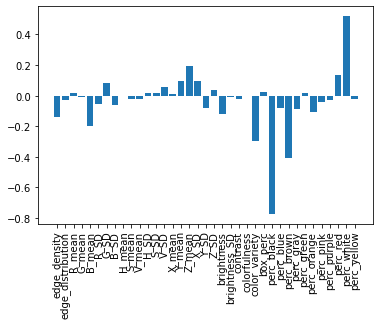

In [47]:
from matplotlib import pyplot
importance = best_clf.best_estimator_.named_steps['classifier'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (ll[i],v))
# plot feature importance
pyplot.bar([ll[x] for x in range(len(importance))], importance)
pyplot.xticks(rotation=90)
pyplot.show()